<a href="https://colab.research.google.com/github/nadunchanna98/machine-learning/blob/main/Unsupervised_Learning__Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019/E/094
## Assignment 5
## Unsupervised Learning

##### This is to get familiar with the K-means package in python.

#### 1. Use some clustering based data from python dataset or from UCI data repository.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [19]:
data = fetch_openml(name='wine', version=1, as_frame=True)
df = data['frame']
df

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
df.columns

Index(['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280%2FOD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [21]:
X = df.drop('class', axis=1)

#### 2. Use the KMeans package from python sklearn to cluster your data.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)   #n_clusters=3 to create three clusters.
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

#### 3. Now plot your data before and after the clustering.
#### Before clustering

Text(0.5, 1.0, 'Original Data')

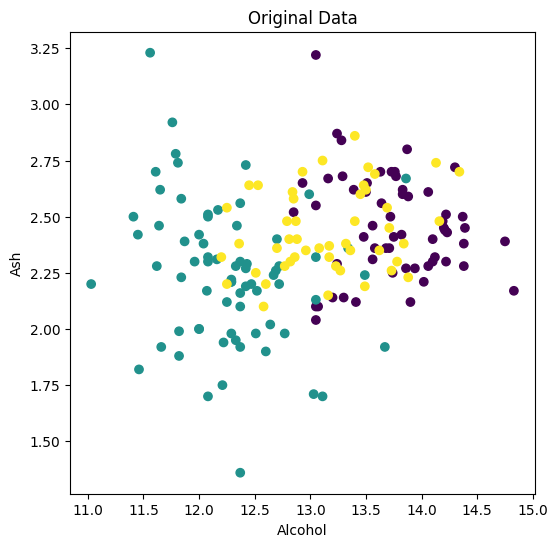

In [35]:
fig, ax1 = plt.subplots(figsize=(6, 6))
ax1.scatter(X['Alcohol'], X['Ash'], c=df['class'].astype('category').cat.codes)
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Ash')
ax1.set_title('Original Data')

*Before Clustering (Original Data):*

*In the original dataset with multiple samples (wines) and their corresponding features.Each sample is represented by a set of attribute values, such as 'alcohol', 'ash', and other chemical attributes in the Wine dataset.The data points are not yet grouped or assigned to any clusters.The goal is to identify inherent patterns or clusters in the data.*

#### After clustering

Text(0.5, 1.0, 'Clustered Data')

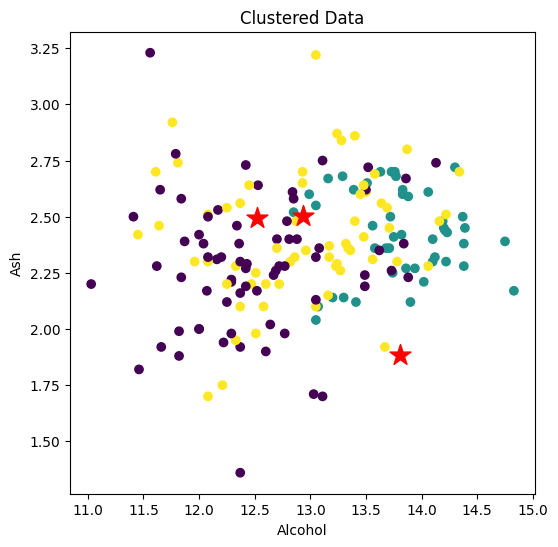

In [37]:
fig, ax2 = plt.subplots(figsize=(6, 6))
ax2.scatter(X['Alcohol'], X['Ash'], c=kmeans.labels_)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=250, color='red')
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('Ash')
ax2.set_title('Clustered Data')

*After Clustering (Clustered Data):*

*After clustering, the data points are assigned to different clusters based on their similarity in attribute values.
Each data point is now associated with a cluster label determined by the K-means algorithm.*

*The algorithm calculates cluster centroids, which represent the mean values of the attributes for the data points in each cluster.(red star symbol)*

*The clustered data helps visualize the grouping of samples into distinct clusters.*

#### 4. Use the classification report to interpret your results.


In [43]:
target_names = df['class'].unique()
target_labels = df['class'].astype(int)
labels = target_labels.unique()
print(classification_report(target_labels, kmeans.labels_, labels=labels, target_names=target_names, zero_division=0))

              precision    recall  f1-score   support

           1       0.98      0.78      0.87        59
           2       0.32      0.28      0.30        71
           3       0.00      0.00      0.00        48

   micro avg       0.61      0.37      0.46       178
   macro avg       0.43      0.35      0.39       178
weighted avg       0.45      0.37      0.41       178



*The classification_report function is a useful tool for evaluating the performance of a clustering algorithm by comparing the predicted cluster labels (kmeans.labels_) with the true class labels (target_labels).*

*Micro Average: In micro averaging, the metrics (precision, recall, F1-score) are calculated globally by considering the total number of true positives, false positives, and false negatives across all classes. It treats all classes equally and provides a single aggregate score for the entire dataset.*

*Macro Average: In macro averaging, the metrics are calculated separately for each class, and then averaged to obtain a single score. Each class is given equal weight, regardless of the class imbalance in the dataset. It is useful when you want to assess the performance of the model for each individual class.*

*Weighted Average: Weighted averaging is similar to macro averaging, but takes into account the class imbalance. In this case, the metrics are calculated for each class and weighted by the number of samples in each class. Classes with more samples have a higher impact on the average, providing a more representative measure when there is a class imbalance.*


